In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('base de dados.csv')
dados.shape

(7043, 18)

In [3]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [5]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'PagamentoOnline', 'TelefoneFixo', 'Churn'], 
                                         axis=1))

#junção dos dados transformados pelo dummie e pelo tradutor
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [6]:
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [7]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

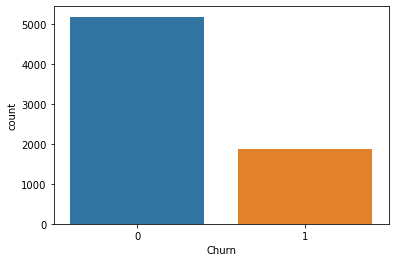

In [8]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [9]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [10]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [11]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


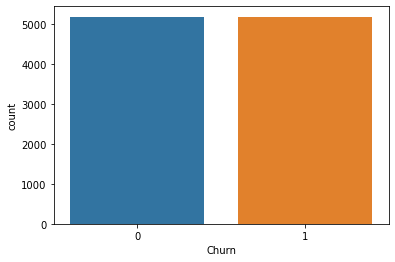

In [12]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [13]:
x = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [14]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
x_normalizado = norm.fit_transform(x)
x_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ]])

In [15]:
x_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.81514931, -0.41254225,
       -1.10768665, -1.32177005, -0.88499468,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.51751958, -0.95853201, -0.44617598,  1.57389661,  1.04306   ,
       -0.44617598, -0.6419641 ,  0.87997069, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20287745, -0.44617598,
       -0.79008532, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30373042, -0.47943196, -0.4360152 ])

In [16]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns=X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51751958, -0.95853201, -0.44617598,  1.57389661,  1.04306   ,
         2.24126814, -0.6419641 , -1.13640148,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83133988, -0.44617598,
         1.26568609, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76702973, -0.47943196,  2.293498  ]])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_treino, X_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size = 0.3, random_state=123)
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_treino, y_treino)
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [18]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ]])

In [19]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [22]:
import numpy as np

mediana = np.median(X_treino)

In [27]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=mediana)
bnb.fit(X_treino, y_treino)
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)